In [197]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualization Tools
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [158]:
df = pd.read_csv('data_w_genres.csv')
df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [159]:
df.genres = df.genres.str.split(',',expand=True)[0]

In [160]:
df.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [189]:

duplicate_rows = df[df.duplicated()]


print("Duplicate rows:")
print(duplicate_rows)


num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate rows:
Empty DataFrame
Columns: [artists, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, key, mode, count, genres]
Index: []
Number of duplicate rows: 0


In [162]:
df_d = pd.read_csv('data.csv')

In [163]:
df_d.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333.0,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5.0,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200.0,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5.0,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1/5/20,0.0534,86.889,0.9500,1920.0
2,0.993000,['Mamie Smith'],0.647,163827.0,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0
3,0.000173,['Oscar Velazquez'],0.730,422087.0,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2.0,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1/1/20,0.0425,127.997,0.0422,1920.0
4,0.295000,['Mixe'],0.704,165224.0,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,10.0,0.4020,-6.036,0.0,Xuniverxe,2.0,10/1/20,0.0768,122.076,0.2990,1920.0


In [164]:
df_d ['popularity'].value_counts()

0.0     2264
4.0      200
1.0      181
5.0      175
6.0      169
        ... 
64.0       1
63.0       1
52.0       1
73.0       1
65.0       1
Name: popularity, Length: 65, dtype: int64

In [165]:
songdata = pd.merge(df, df_d, how='outer', left_index=True, right_index=True, suffixes=('', '_d'))

In [166]:
print("Merged Song DataFrame:")
print(songdata.head())

Merged Song DataFrame:
                                             artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.598500   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.470100  267072.000000  0.376203          0.010261  0.283050   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.467143  270436.142857  0.488286          0.009400  0.195000   

    loudness  speechiness       tempo  ...  liveness_d  loudness_d  mode_d  \
0 -14.434300     0.209150  114.128800  ...   

In [167]:
songdata.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,liveness_d,loudness_d,mode_d,name,popularity_d,release_date,speechiness_d,tempo_d,valence_d,year
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,...,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,...,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1/5/20,0.0534,86.889,0.9500,1920.0
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,...,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,...,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1/1/20,0.0425,127.997,0.0422,1920.0
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,...,0.4020,-6.036,0.0,Xuniverxe,2.0,10/1/20,0.0768,122.076,0.2990,1920.0


In [168]:
cat_features=['key','mode','year']
songdata[cat_features] = songdata[cat_features].astype("category")
songdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 0 to 5693
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   artists             5694 non-null   object  
 1   acousticness        5694 non-null   float64 
 2   danceability        5694 non-null   float64 
 3   duration_ms         5694 non-null   float64 
 4   energy              5694 non-null   float64 
 5   instrumentalness    5694 non-null   float64 
 6   liveness            5694 non-null   float64 
 7   loudness            5694 non-null   float64 
 8   speechiness         5694 non-null   float64 
 9   tempo               5694 non-null   float64 
 10  valence             5694 non-null   float64 
 11  popularity          5694 non-null   float64 
 12  key                 5694 non-null   category
 13  mode                5694 non-null   category
 14  count               5694 non-null   int64   
 15  genres              5694 non-null   ob

In [170]:
from scipy import stats
import numpy as np
import pandas as pd

def catch_outliers(df, threshold):
    df = df.copy()
    numericdata = df.select_dtypes(include=[np.number, 'Float64'])  # Include 'Float64' if needed
    
    # Ensure no infinities or NaN values are present
    numericdata.replace([np.inf, -np.inf], np.nan, inplace=True)
    numericdata.dropna(inplace=True)
    
    # Convert to a consistent type that supports sqrt
    numericdata = numericdata.astype(np.float64)
    
    # Calculate the z-score for the specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in the dataframe
    z_score_df = pd.DataFrame(stats.zscore(numericdata, nan_policy='omit'), columns=numericdata.columns)
    
    # Return the count of outliers in each column, compared to the threshold
    return (np.abs(z_score_df) > threshold_z_score).sum()

catch_outliers(songdata, 0.6827)


acousticness          4370
danceability          3437
duration_ms           1693
energy                3720
instrumentalness      4664
liveness              3295
loudness              3409
speechiness           2138
tempo                 3123
valence               3550
popularity            4223
count                  393
acousticness_d        3417
danceability_d        3674
duration_ms_d         1423
energy_d              3192
explicit               250
instrumentalness_d    4833
key_d                 4101
liveness_d            3521
loudness_d            3398
mode_d                5292
popularity_d          3865
speechiness_d         2430
tempo_d               3327
valence_d             3599
dtype: int64

In [171]:
catch_outliers(songdata,0.9545)

acousticness            0
danceability          470
duration_ms           101
energy                285
instrumentalness      738
liveness              347
loudness              340
speechiness           301
tempo                 494
valence               463
popularity            270
count                 137
acousticness_d        495
danceability_d        409
duration_ms_d         218
energy_d              346
explicit              250
instrumentalness_d    112
key_d                 213
liveness_d            364
loudness_d            465
mode_d                  0
popularity_d          380
speechiness_d         568
tempo_d               504
valence_d             368
dtype: int64

In [172]:
catch_outliers(songdata,0.9973)

acousticness            0
danceability            9
duration_ms            35
energy                  0
instrumentalness        0
liveness              156
loudness               94
speechiness           113
tempo                  59
valence                 0
popularity              2
count                  72
acousticness_d        242
danceability_d         14
duration_ms_d         100
energy_d               98
explicit              250
instrumentalness_d      0
key_d                   0
liveness_d            178
loudness_d             58
mode_d                  0
popularity_d          136
speechiness_d         345
tempo_d                64
valence_d               0
dtype: int64

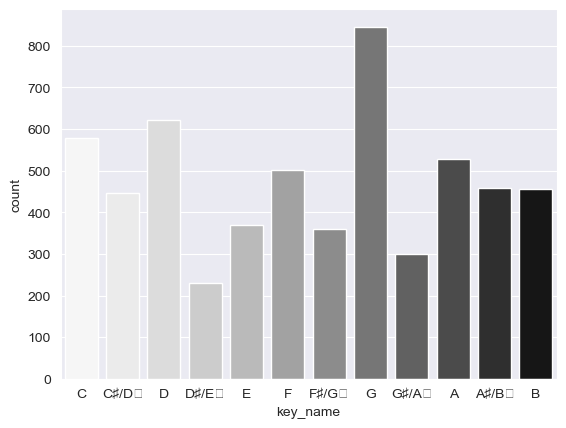

In [203]:
key_mapping = {
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
}


if 'key_name' not in songdata.columns:
    songdata['key_name'] = songdata['key'].map(key_mapping)

def cat_plot(variable, data, color=None):
    # Set a color palette
    palette = 'Greys' if color == 'grey' else None
    # Create a countplot
    sns.countplot(x=variable, data=data, palette=palette)
    # Show the plot
    plt.show()

cat_plot('key_name', songdata, color='grey')

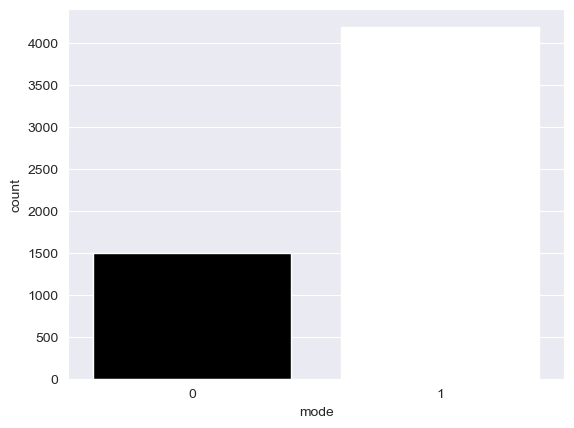

In [204]:

def cat_plot(variable, data):

    palette = {0: "black", 1: "white"} 


    sns.countplot(x=variable, data=data, palette=palette)

    plt.show()

cat_plot('mode', songdata)


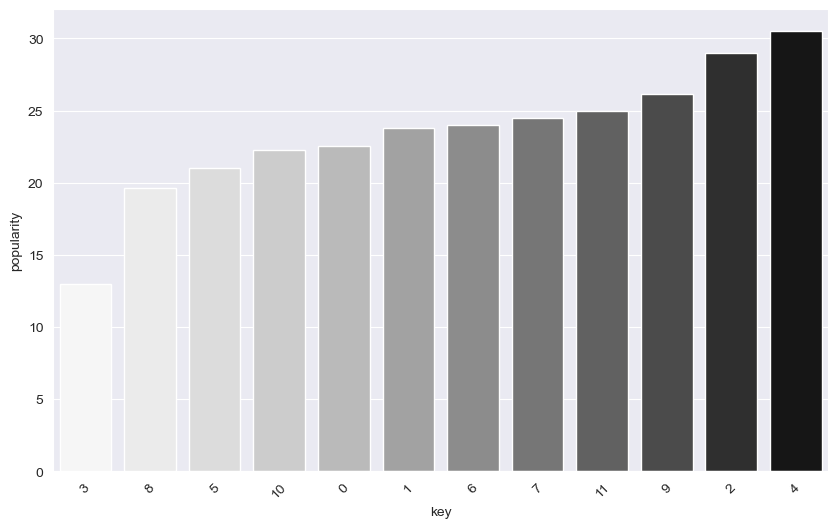

In [205]:
 grouped_data = songdata.groupby('key')['popularity'].median().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=grouped_data,
    x='key',
    y='popularity',
    palette='Greys',
    order=grouped_data.sort_values('popularity')['key']
)

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

plt.show()

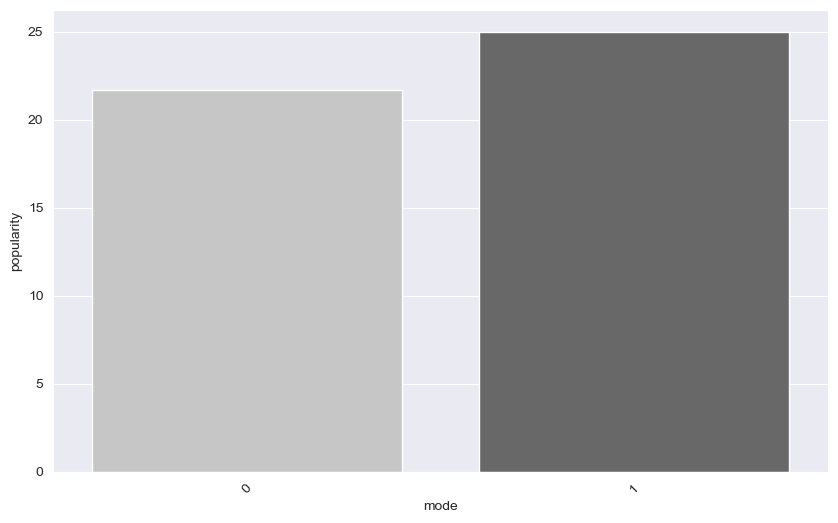

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_mode_data = songdata.groupby('mode')['popularity'].median().reset_index()

plt.figure(figsize=(10, 6))
mode_barplot = sns.barplot(
    data=grouped_mode_data,
    x='mode',
    y='popularity',
    palette='Greys'
)

mode_barplot.set_xticklabels(mode_barplot.get_xticklabels(), rotation=45)

plt.show()


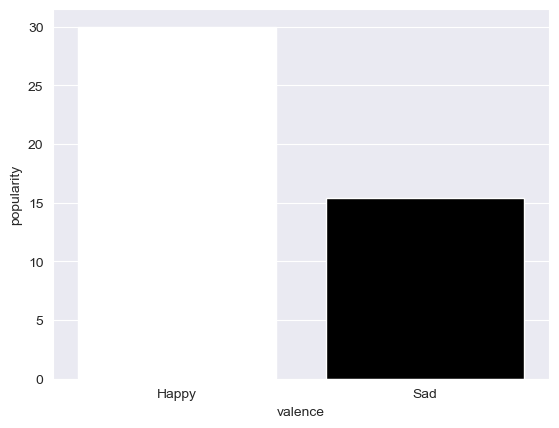

In [201]:
valence_data = songdata.copy()
valence_data['valence'] = np.where(songdata['valence']>=0.5,'Happy','Sad')

sns.barplot(valence_data.groupby('valence').median().reset_index(),
             x='valence',
             y='popularity',
             palette=['white', 'black'])
plt.show()

In [125]:
songdata['genres'].value_counts().head(5).index.tolist()

['[]',
 "['dance pop'",
 "['adult standards'",
 "['alternative metal'",
 "['contemporary country'"]

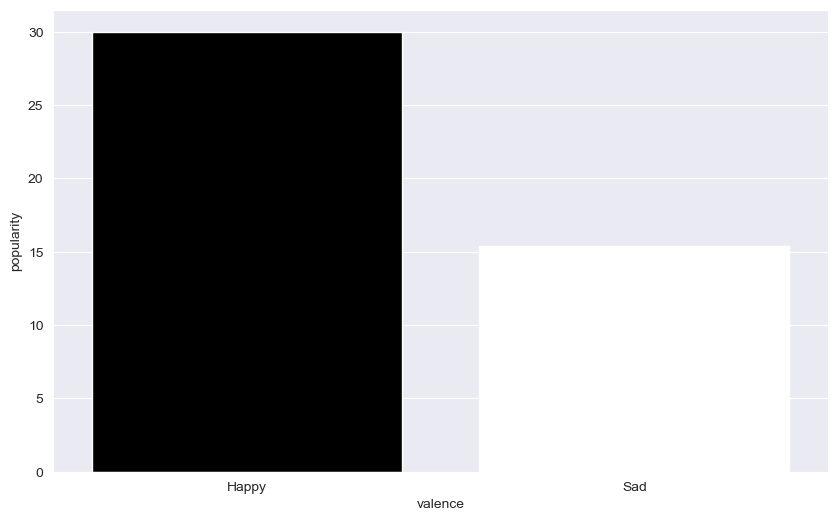

In [207]:

valence_data = songdata.copy()

valence_data['valence'] = np.where(valence_data['valence'] >= 0.5, 'Happy', 'Sad')


median_popularity = valence_data.groupby('valence')['popularity'].median().reset_index()


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=median_popularity,
    x='valence',
    y='popularity',
    palette=['black', 'white']  # Ensure this order matches the sorted valence categories
)

plt.show()


In [177]:
genre_counts = songdata['genres'].value_counts()

print(genre_counts)

Mixed Genre                2279
['dance pop'                 76
['adult standards'           76
['alternative metal'         52
['contemporary country'      46
                           ... 
['surf music']                1
['yugoslav new wave'          1
['alternative pop rock'       1
['shabad']                    1
['cumb                        1
Name: genres, Length: 1277, dtype: int64


In [178]:
unique_genres = songdata['genres'].drop_duplicates()

print(unique_genres)


0        ['show tunes']
1           Mixed Genre
8        ['comedy rock'
10       ['florida rap'
11         ['dark trap'
             ...       
5684      ['pornogrind'
5685        ['emo punk'
5687    ['belgian edm']
5688    ['experimental'
5693             ['cumb
Name: genres, Length: 1277, dtype: object


In [179]:

songdata['genres'] = songdata['genres'].str.replace(r"[\[\]']", '', regex=True)


unique_genres = songdata['genres'].drop_duplicates()

print(unique_genres)

0         show tunes
1        Mixed Genre
8        comedy rock
10       florida rap
11         dark trap
            ...     
5684      pornogrind
5685        emo punk
5687     belgian edm
5688    experimental
5693            cumb
Name: genres, Length: 1060, dtype: object


In [190]:

songdata['genres'] = songdata['genres'].str.replace(r"[\[\]']", '', regex=True)

songdata['genres'] = songdata['genres'].drop_duplicates()

print(songdata['genres'])

0        show tunes
1       Mixed Genre
2               NaN
3               NaN
4               NaN
           ...     
5689            NaN
5690            NaN
5691            NaN
5692            NaN
5693           cumb
Name: genres, Length: 5694, dtype: object


In [191]:
num_unique_genres = len(unique_genres)
print("Total number of unique genres:", num_unique_genres)

Total number of unique genres: 1060


In [182]:

genre_counts_by_year = songdata.groupby(['year', 'genres']).size().reset_index(name='count')

sorted_genres = genre_counts_by_year.groupby('genres')['count'].sum().sort_values(ascending=False)

top_50_genres = sorted_genres.head(50)

print(top_50_genres)


genres
"australian childrens music"    1
jam band                        1
japanese instrumental           1
japanese jazz                   1
japanese piano                  1
jazz accordion                  1
jazz blues                      1
jazz cubano                     1
jazz double bass                1
jazz drums                      1
jazz flute                      1
jazz funk                       1
jazz fusion                     1
jazz orchestra                  1
jazz organ                      1
jazz piano                      1
jazz quartet                    1
jazz rap                        1
jazz saxophone                  1
jazz trio                       1
jazz trombone                   1
jazz trumpet                    1
jordanian pop                   1
jovem guarda                    1
jump blues                      1
jumpstyle                       1
k-indie                         1
k-pop                           1
k-pop boy group                 1
k-rap  

In [183]:
popular = songdata[songdata['popularity'] > 70]
popular

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,loudness_d,mode_d,name,popularity_d,release_date,speechiness_d,tempo_d,valence_d,year,key_name
10,$NOT,0.458167,0.826667,146886.333333,0.518667,0.000007,0.201683,-8.713167,0.272550,90.728833,...,-15.208,0.0,Oouin,0.0,1920,0.8450,82.024,0.414,1920.0,C
20,(G)I-DLE,0.026794,0.534000,193085.600000,0.829800,0.000002,0.168880,-3.950800,0.061040,130.417800,...,-21.081,1.0,On a Ragga Trip,8.0,1/3/20,0.0376,140.011,0.578,1920.0,F♯/G♭
99,21 Savage,0.132509,0.791313,218541.708333,0.594875,0.037068,0.158837,-6.604958,0.261023,125.872271,...,-17.822,1.0,The Girl That I Marry,0.0,1920,0.0391,88.945,0.135,1920.0,C♯/D♭
101,24hrs,0.074200,0.536000,192000.000000,0.879000,0.000000,0.084700,-3.019000,0.062100,140.137000,...,-8.879,1.0,Born Up - Original Mix,0.0,1/1/20,0.1940,128.069,0.392,1920.0,C♯/D♭
102,24kGoldn,0.141665,0.714500,157811.416667,0.684000,0.000002,0.161500,-4.680167,0.094483,129.348833,...,-7.859,0.0,A Flower's Theme,0.0,1/1/20,0.0514,93.022,0.848,1920.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,Clairo,0.527609,0.736043,179009.565217,0.505843,0.035362,0.162761,-9.078652,0.061474,114.430000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
5420,Clams Casino,0.684000,0.900000,107077.000000,0.316000,0.077100,0.085300,-8.797000,0.332000,129.914000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
5500,Clever,0.307400,0.703000,195875.000000,0.578000,0.000007,0.302000,-5.083500,0.067450,150.026500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G♯/A♭
5563,Cochise,0.022100,0.734000,149145.000000,0.692000,0.000000,0.224000,-6.227000,0.055500,77.994000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


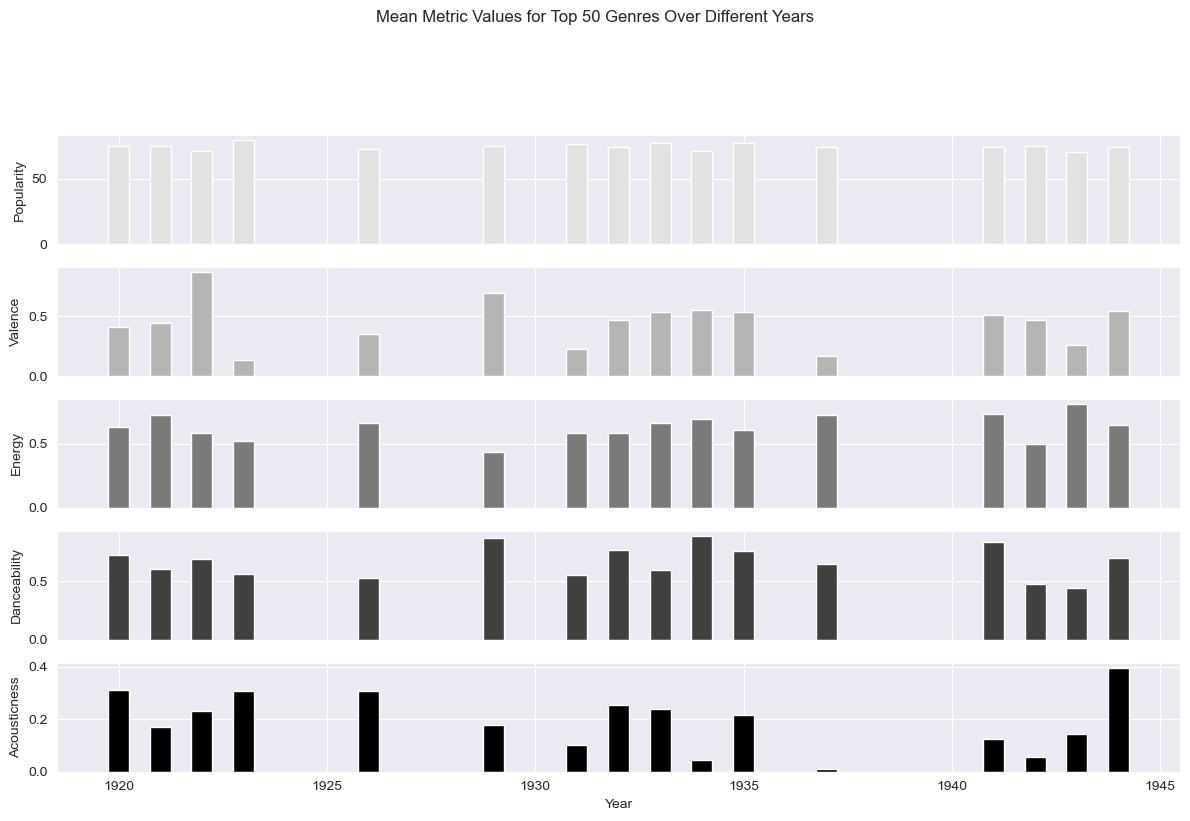

In [209]:

popular_songs = songdata[songdata['popularity'] > 70]


genre_metrics_by_year = popular_songs.groupby(['year', 'genres']).agg({
    'popularity': 'mean',
    'valence': 'mean',
    'energy': 'mean',
    'danceability': 'mean',
    'acousticness': 'mean'
}).reset_index()


top_50_genres = genre_metrics_by_year['genres'].value_counts().head(50).index


top_50_genre_metrics = genre_metrics_by_year[genre_metrics_by_year['genres'].isin(top_50_genres)]

metrics = ['popularity', 'valence', 'energy', 'danceability', 'acousticness']


greys = cm.get_cmap('Greys')


fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 8), sharex=True)

for i, (ax, metric) in enumerate(zip(axes, metrics)):
    # Group genre metrics by year for the current metric
    metric_grouped = top_50_genre_metrics.groupby('year')[metric].mean()
    # Plot bar chart with Greyscale color, the intensity based on the metric's row for visual variety
    ax.bar(clean_years, metric_grouped, width=0.5, color=greys((i+1)/len(metrics)))
    ax.set_ylabel(metric.capitalize())


plt.xlabel('Year')

plt.suptitle('Mean Metric Values for Top 50 Genres Over Different Years', y=1.05)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [193]:
artists_counts = songdata['artists'].value_counts()

print(artists_counts)

"Cats" 1981 Original London Cast    1
Breakfast                           1
Brandon Fields                      1
Brandon Casey                       1
Brando                              1
                                   ..
Archibald MacLeish                  1
Archers Of Loaf                     1
Archana Goon                        1
Archana                             1
Concept Neuf                        1
Name: artists, Length: 5694, dtype: int64


In [194]:
unique_artists = songdata['artists'].drop_duplicates()

print(unique_artists)

0                        "Cats" 1981 Original London Cast
1                               "Cats" 1983 Broadway Cast
2             "Fiddler On The Roof” Motion Picture Chorus
3          "Fiddler On The Roof” Motion Picture Orchestra
4       "Joseph And The Amazing Technicolor Dreamcoat"...
                              ...                        
5689                                        Con Funk Shun
5690                                           Conan Gray
5691                                 Concentus Hungaricus
5692                                Concept Art Orchestra
5693                                         Concept Neuf
Name: artists, Length: 5694, dtype: object


In [195]:

unique_artists = songdata['artists'].drop_duplicates()


num_unique_artists = len(unique_artists)
print(f"There are {num_unique_artists} unique artists.")


There are 5694 unique artists.


In [196]:

popular_songs = songdata[songdata['popularity'] > 70]


artist_popularity_count = popular_songs.groupby('artists')['popularity'].count().reset_index()


top_artists_by_popular_songs = artist_popularity_count.sort_values('popularity', ascending=False)


top_artists = top_artists_by_popular_songs.head(50)

print(top_artists)


               artists  popularity
0                 $NOT           1
91      Calming Sounds           1
89        Cailin Russo           1
88              CORPSE           1
87                  CJ           1
86           CHROMANCE           1
85            CHANYEOL           1
84                CADE           1
83           Burna Boy           1
82            Brytiago           1
81        Bryant Myers           1
80         Bruno Major           1
79               Brray           1
78      Brennan Savage           1
77        Brendon Urie           1
76      Bradley Cooper           1
75                Boza           1
74               Blxst           1
73            Blueface           1
72        Blanco Brown           1
71            Blackway           1
70        Black Caviar           1
69       Bishop Briggs           1
68    Bipolar Sunshine           1
67       Billie Eilish           1
66             Big Boy           1
65     Beth McLaughlin           1
64      Bert McCrack